In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
cols = ['Name', 'Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate']

In [12]:
data_df = pd.read_csv('../data/pokemon.csv', usecols=cols)

In [13]:
data_df.head()

,Name,Type_1,Total,HP,Attack,Defense,Speed,Height_m,Weight_kg,Catch_Rate
0,Bulbasaur,Grass,318,45,49,49,45,0.71,6.9,45
1,Ivysaur,Grass,405,60,62,63,60,0.99,13.0,45
2,Venusaur,Grass,525,80,82,83,80,2.01,100.0,45
3,Charmander,Fire,309,39,52,43,65,0.61,8.5,45
4,Charmeleon,Fire,405,58,64,58,80,1.09,19.0,45


In [14]:
data_df.isnull().sum(axis=0)

Name          0
Type_1        0
Total         0
HP            0
Attack        0
Defense       0
Speed         0
Height_m      0
Weight_kg     0
Catch_Rate    0
dtype: int64

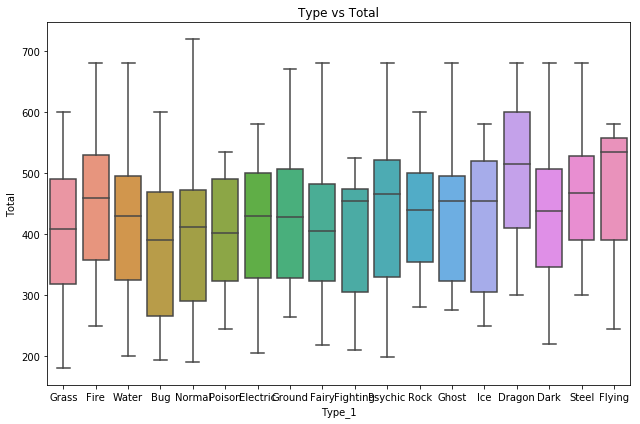

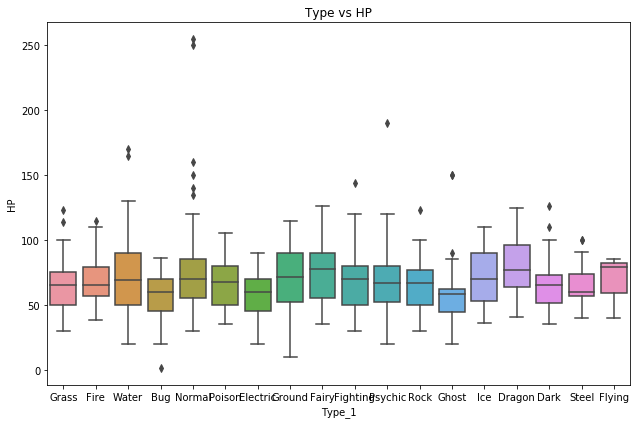

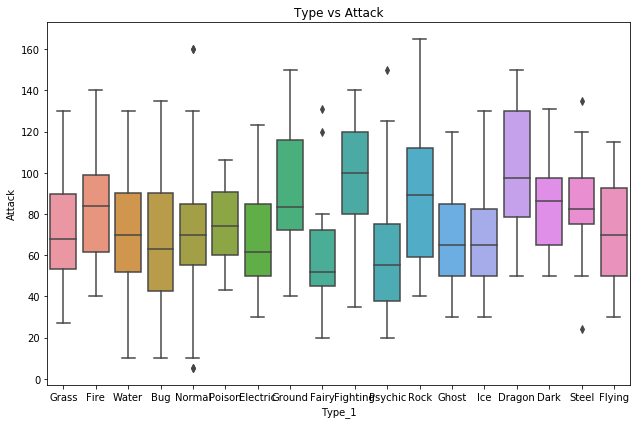

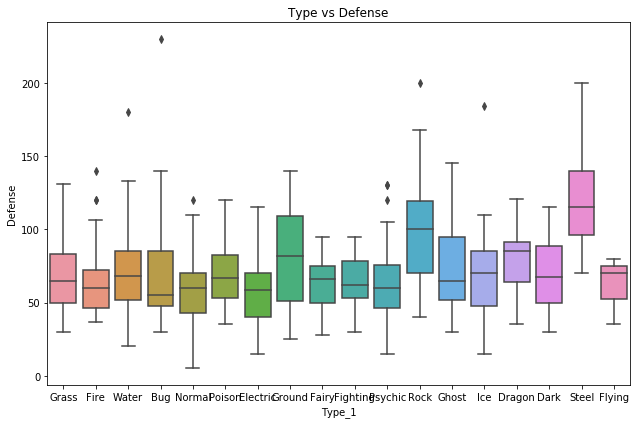

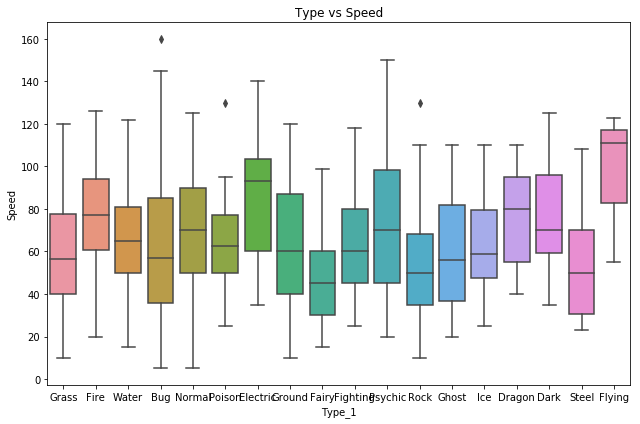

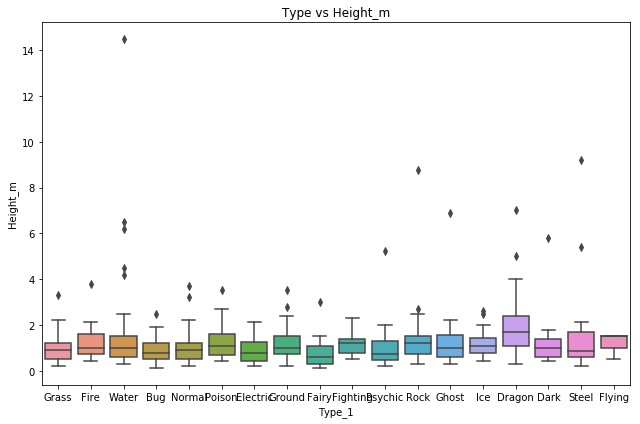

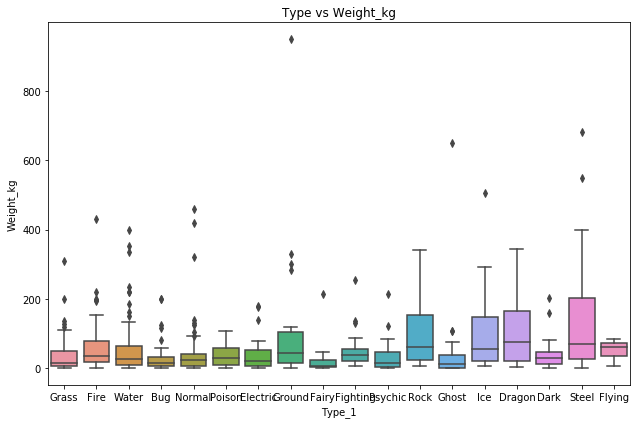

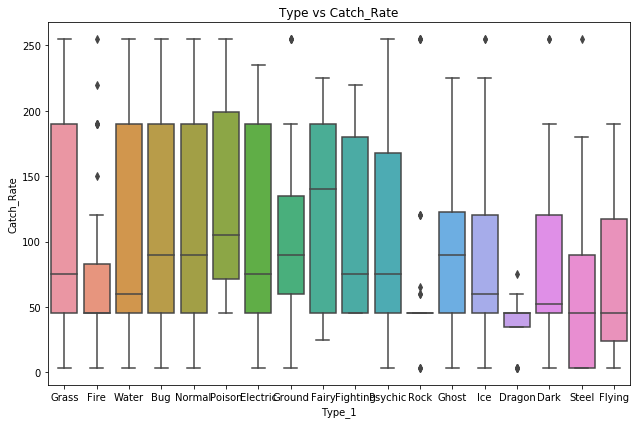

In [35]:
for attr in cols[2:]:
    plt.figure(figsize=(9,6))
    sns.boxplot(x='Type_1', y=attr, data=data_df)
    plt.title('Type vs {}'.format(attr))
   plt.show()

In [ ]:
```python

"""
    明确任务：
        1. 比较不同类别精灵属性值分布
        2. 查看双变量数据分布
        3. 查看变量间的关系
"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datafile_path = './data_pd/pokemon.csv'

# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)


def collect_data():
    """
        数据获取
    """
    cols = ['Name', 'Type_1', 'Total', 'HP', 'Attack', 'Defense', 'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate']
    data_df = pd.read_csv(datafile_path, usecols=cols)
    return data_df


def inspect_data(data_df):
    """
        查看数据
    """
    print('数据一共有{}行，{}列'.format(data_df.shape[0], data_df.shape[1]))

    print('数据预览：')
    print(data_df.head())

    print('数据基本信息：')
    print(data_df.info())

    print('数据统计信息：')
    print(data_df.describe())


def process_data(data_df):
    """
        数据处理
    """
    cln_data_df = data_df.dropna()
    print('原始数据有{}行记录，处理后的数据有{}行记录'.format(data_df.shape[0], cln_data_df.shape[0]))
    return cln_data_df


def analyze_by_type(data_df, attr):
    """
        比较不同类别精灵属性值分布
    """
    sns.boxplot(x='Type_1', y=attr, data=data_df)
    plt.show()


def analyze_dual_variables(data_df, var1, var2):
    """
        双变量数据分布查看
    """
    sns.jointplot(x=var1, y=var2, data=data_df)
    plt.show()


def analyze_vaiables_relationship(data_df):
    """
        可视化变量间关系
    """
    corr_df = data_df.corr()
    sns.heatmap(corr_df, annot=True)
    plt.show()


def main():
    """
        主函数
    """
    # 数据获取
    data_df = collect_data()

    # 查看数据信息
    inspect_data(data_df)

    # 数据处理
    proc_data_df = process_data(data_df)

    analyze_by_type(proc_data_df, 'Attack')
    analyze_dual_variables(proc_data_df, 'Attack', 'Defense')
    analyze_vaiables_relationship(proc_data_df)


if __name__ == '__main__':
    main()
```